# CHAPTER 5. 모델 평가와 성능 향상

지금까지 지도 학습과 비지도 학습 이론을 다루면서 다양한 머신러닝 알고리즘을 살펴봤습니다.
이제 모델 평가와 매개변수 선택에 대해 더 자세히 배워보도록 하겠습니다.

3장에서 보았듯이 비지도 학습 모델을 평가하고 선택하는 일은 매우 정성적인 작업이므로 이번 장에서는 지도 학습인 회귀와 분류 모델의 평가와 선택에 집중할 것입니다.

우리는 지도 학습 모델을 평가하기 위해 train_test_split 함수를 사용하여 데이터셋을 훈련 세트와 테스트 세트로 나눴습니다.
그리고 모델을 만들기 위해 훈련 세트에 fit 메서드를 적용했고, 모델을 평가하기 위해 테스트 세트에 score 메서드를 사용했습니다.
예를 들어 분류에서 score 메서드는 정확히 분류된 샘플의 비율을 계산하는 역할을 합니다.
다음 코드는 설명한 과정을 담은 예제입니다.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다.
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 객체를 만들고 훈련 세트로 학습시킵니다.
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다.
print(f'테스트 세트 점수: {logreg.score(X_test, y_test):.2f}')

테스트 세트 점수: 0.88


데이터를 훈련 세트와 테스트 세트로 나누는 이유는 지금까지 본 적 없는 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서입니다.
모델이 훈련 세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요합니다.

이번 장에서는 두 가지 관점에서 이 평가 방법을 확장해보겠습니다.
먼저 안정적인 일반화 성능 측정 방법인 교차 검증을 소개하고, score 메서드가 제공하는 정확도와 R<sup>2</sup> 값 이외에 분류와 회귀 성능을 측정하는 다른 방법을 알아보겠습니다.

또한, 가장 좋은 일반화 성능을 얻기 위해서 지도 학습 모델의 매개변수를 조정하는 데 유용한 그리드 서치에 관해서도 이야기하겠습니다.

## 5.1 교차 검증

**교차 검증**은 일반화 성능을 재기 위해 훈련 세트와 테스트 세트로 한 번 나누는 것 보다 더 안정적이고 뛰어난 통계적 평가 방법입니다.
교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습합니다.
가장 널리 사용되는 교차 검증 방법은 **k-겹 교차 검증**으로 k는 특정 숫자로 보통 5나 10을 사용합니다.
k-겹 교차 검증을 하려면 데이터를 먼저 **폴드**라고 하는 거의 비슷한 크기의 '부분 집합' k개로 나눕니다.
그다음 일련의 모델들을 만듭니다.
첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습합니다.
즉, 이 모델은 k-1개의 데이터를 사용해 만들어지고 1개의 폴드를 사용해 정확도를 평가합니다.
그다음 두 번째 모델은 두 번째 폴드를 테스트 세트로 사용하고 나머지 폴드의 데이터를 훈련 데이터로 사용합니다.
이런 방법으로 나머지 폴드를 테스트 세트로 사용하고 학습을 반복합니다.
이렇게 데이터를 훈련 세트와 테스트 세트로 나누는 k번의 분할마다 정확도를 측정하여, 결국 k개의 정확도 값을 얻게 됩니다.
이 과정을 나타내면 다음과 같습니다.

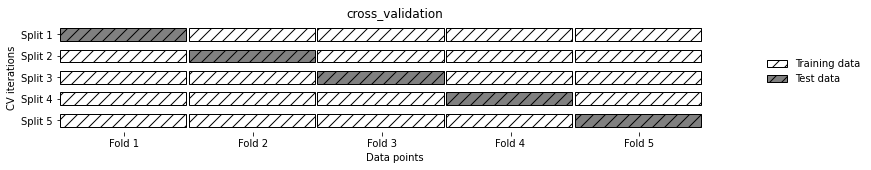

In [2]:
import mglearn

mglearn.plots.plot_cross_validation()

보통 데이터의 첫 번째 1/k 조각이 첫 번째 폴드이고 두 번째 조각이 두 번째 폴드가 되는 방식입니다.

### 5.1.1 scikit-learn의 교차 검증

scikit-learn에서 교차 검증은 model_section 모듈의 cross_val_score 함수로 구현되어 있습니다.
cross_val_score 함수의 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블입니다.
iris 데이터셋에 적용한 LogisticRegression을 평가해보겠습니다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


여기에서는 cross_val_score가 5-겹 교차 검증을 수행했기 때문에 5개의 점수가 반환되었습니다.
현재 scikit-learn의 기본 값은 5-겹 교차 검증이지만 scikit-learn 0.22 버전 이전은 3-겹 교차 검증이 진행됩니다.<sup>[1]</sup>
폴드의 수는 cv  매개변수를 사용해서 바꿀 수 있습니다.

<sup>[1]</sup>:
GridSearchCV 클래스도 scikit-learn 0.22 버전부터 3-겹 교차 검증에서 5-겹 교차 검증으로 바뀌었습니다.

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.98 0.96 0.98]


적어도 5-겹 교차 검증 정도를 사용하는 것이 좋습니다. 교차 검증의 정확도를 간단라게 나타내려면 평균을 사용합니다.

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target)
print(f'교차 검증 점수 평균: {scores.mean():.2f}')

교차 검증 점수 평균: 0.97


교차 검증 점수의 평균값으로 우리는 이 모델의 정확도가 대략 97%일 것으로 기대할 수 있습니다.
5-겹 교차 검증이 만들 다섯 개의 값을 모두 보면 100%에서 90%까지 폴드에 따라 비교적 차이가 큽니다.
이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있습니다.
교차 검증에 cross_validate 함수를 사용할 수도 있습니다.
이 함수는 cross_val_score 함수와 인터페이스가 비슷하지만 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환합니다.
여기서 테스트 점수를 포함해 설정에 따라 훈련 점수도 얻을 수 있습니다.<sup>[2]</sup>

<sup>[2]</sup>:
사실 cross_val_score 함수는 cross_validate 함수를 사용합니다.
cross_val_score 함수는 cross_validate에서 반환된 결과 중 test_score 키의 값만 반환합니다.
cross_validate 함수에 관한 더 자세한 내용은 [블로그](https://biy.ly/2B05jJ3)를 참고하세요.

In [6]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.02892208, 0.03390861, 0.02991962, 0.01994681, 0.03291273]),
 'score_time': array([0.       , 0.       , 0.       , 0.0009973, 0.       ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

pandas를 사용하여 걸과값을 출력하고 평균을 계산해보겠습니다.

In [7]:
from IPython.display import display
import pandas as pd

df = pd.DataFrame(res)
display(df)
print('\n평균 시간과 점수:\n', df.mean())

,fit_time,score_time,test_score,train_score
0,0.028922,0.000000,0.966667,0.966667
1,0.033909,0.000000,1.000000,0.966667
2,0.029920,0.000000,0.933333,0.983333
3,0.019947,0.000997,0.966667,0.983333
4,0.032913,0.000000,1.000000,0.975000



평균 시간과 점수:
 fit_time       0.029122
score_time     0.000199
test_score     0.973333
train_score    0.975000
dtype: float64


### 5.1.2 교차 검증의 장점

데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것 보다 교차 검증을 사용하면 몇 가지 장점이 있습니다.
먼저 train_test_split은 데이터를 무작위로 나눕니다.
데이터를 무작위로 나눌 때 운 좋게 훈련 세트에는 분류하기 어려운 샘플만 담기게 되었다고 가정해보겠습니다.
이 경우 테스트 세트에는 분류하기 쉬운 샘플만 들어있어서 테스트 세트의 정확도는 비현실적으로 높게 나올 것입니다.
반대로 운 나쁘게 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도가 아주 낮게 나올 것입니다.
하지만 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확히 한 번씩 들어갑니다.
각 샘플은 폴드 중 하나에 속하며 각 폴드는 한 번씩 테스트 세트가 됩니다.
그렇기 때문에 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 합니다.

또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수 있습니다. 예를 들어, iris 데이터셋에서 90~100%의 정확도를 얻었습니다. 이 범위는 꽤 넓으며 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있게 해줍니다.

교차 검증의 또 다른 장점은 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용할 수 있다는 점입니다.
train_test_split을 사용하면 일반적으로 데이터 중 75%를 훈련 세트로 사용하고 25%를 평가에 사용합니다.
반면 5-겹 교차 검증을 사용하면 매 반복에서 4/5의 데이터, 즉 80%를 모델 학습에 사용합니다.
또한, 10-겹 교차 검증이라면 데이터의 9/10인 90%를 모델 학습에 사용합니다.
많은 데이터는 일반적으로 더 정확한 모델을 만들어냅니다.

교차 검증의 주요 단점은 연산 비용이 능어난다는 것입니다. 모델을 k개 만들어야 하므로 데이터를 한 번 나눴을 때보다 대략 k배 더 느립니다.

**NOTE\_**
교차 검증이 새로운 데이터에 적용할 모델을 만드는 방법이 아니라는 점을 잊지 마세요.
교차 검증 함수는 모델을 반환하지 않습니다.
cross_val_score 함수를 호출하면 내부적으로 여러 모델이 만들어지지만, 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것입니다.<sup>[3]</sup>

<sup>[3]</sup>:
교차 검증으로 모델을 만들어낼 수는 없지만 sklearn.model_section 모듈의 cross_val_predict 함수를 사용하여 교차 검증으로 만든 예측값을 구할 수 있습니다.
cross_val_predict(logreg, iris.data, iris.target)과 같이 호출하면 각 폴드가 테스트 세트일 때 예측된 값을 반환해줍니다.

### 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

앞 절에서 언급한 대로 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않습니다. iris 데이터셋으로 예를 들어보겠습니다.

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
print('iris 레이블:\n', iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


결과에서 볼 수 있듯이 첫 번째 1/3은 클래스 0입니다. 두 번째 1/3은 클래스 1이고 마지막 1/3은 클래스 2입니다. 이 데이터에 3-겹 교차 검증을 적용한다고 가정하겠습니다.
첫 번째 폴드는 클래스 0만 가지고 있으므로, 첫 번째 반복에서 테스트 세트는 클래스 0만을, 훈련 세트는 클래스 1과 2만을 가지게 됩니다.
세 번의 반복 모두 훈련 세트와 테스트 세트의 클래스가 다르므로 이 데이터셋에서 3-겹 교차 검증의 정확도는 0이 됩니다.
iris 데이터셋에서 0% 보다는 높은 정확도가 나와야 하므로 이 방법은 잘못되었습니다.

단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 **계층별 k-겹 교차 검증**을 사용합니다.<sup>[4]</sup>
계층별 교차 검증에서는 다음 코드의 결과처럼 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다.

<sup>[4]</sup>:
cross_val_score 함수에서 폴드를 나눌 때 기본적으로 분류에는 StratifiedFold를 사용하여 훈련 세트와 테스트 세트를 나누고, 회귀에는 단순한 KFold를 적용합니다.
KFold에서 shuffle 매개변수를 기본값 False 대신 True로 지정하면 폴드를 나누기 전에 무작위로 섞을 수 있습니다.
하지만 cross_val_score 함수를 사용할 때 KFold의 매개변수를 제어할 방법은 없습니다.
이를 위해서는 다음 절에서 나오는 것처럼 따로 KFold 객체를 만들어 cross_val_score 함수의 cv 매개변수로 전달해야 합니다.

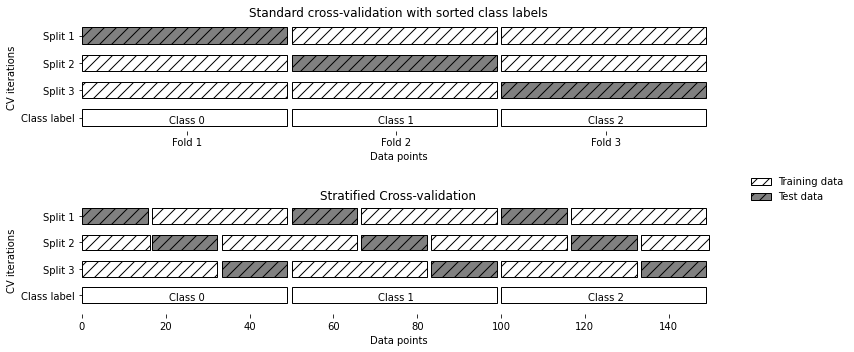

In [9]:
mglearn.plots.plot_stratified_cross_validation()

예를 들어 샘플의 90%가 클래스 A이고 10%가 클래스 B에 속한다면, 계층별 교차 검증은 각 폴드에 클래스 A 샘플이 90%, 클래스 B 샘플이 10%가 되도록 만듭니다.

분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차 검증을 사용하는 것이 좋습니다.
클래스 B에 속한 샘플이 10% 정도라면 기본 k-겹 교차 검증에서는 클래스 A 샘플만 가진 폴드가 생기기 쉽습니다.
이런 폴드를 테스트 세트로 사용하면 분류기의 전체 성능을 크게 왜곡하게 됩니다.

scikit-learn은 회귀에서 기본 k-겹 교차 검증을 사용합니다.
회귀에서도 폴드가 서로 다른 타깃값을 포함하도록 만들 수 있지만, 대부분의 사용자에게는 생소한 일이며 일반적으로 사용하는 방법은 아닙니다.

#### 교차 검증 상세 옵션

앞서 cross_val_score를 사용할 때 cv 매개변수를 이용해 폴드의 개수를 조정해보았습니다.
그러나 scikit-learn에서는 cv 매개변수에 **교차 검증 분할기**를 전달하여 데이터를 분할할 때 더 세밀하게 제어할 수 있습니다.
대부분의 경우 회귀에서는 k-겹 교차 검증, 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동합니다.
하지만 조금 다른 전략이 필요할 때가 있습니다.
예를 들어 다른 사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야할 때입니다.
이렇게 하려면 먼저 model_selection 모듈에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성해야 합니다.

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

그런 다음 kfold 객체를 cross_val_score의 cv 매개변수로 전달합니다.

In [11]:
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [1.         1.         0.86666667 0.93333333 0.83333333]


다음 iris 데이터셋에 3-겹 교차 검증을 사용하는 것ㅇ이 좋은 방법이 아님을 확인해보겠습니다.

In [12]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [0. 0. 0.]


각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수가 없습니다.
계층별 폴드를 만드는 대신 이 문제를 해결하는 다른 방법은 데이터를 섞어서 샘플의 순서를 뒤죽박죽으로 만드는 것입니다.
이렇게 하려면 KFold의 shuffle 매개변수를 True로 주면 됩니다.
데이터를 섞을 때 random_state를 고정해서 똑같은 작업을 재현할 수 있습니다.
그렇지 않으면 cross_val_score를 실행할 때마다 폴드가 바뀌어 매번 결과가 달라질 것입니다.
이는 문제가 되는 것은 아니지만 예상하지 못해 당황할 수는 있습니다.
데이터를 분할하기 전에 섞어주면 결과를 더 좋게 만듭니다.

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수:', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: [0.98 0.96 0.96]


#### LOOCV

또 다른 교차 검증 방법으로 **LOOCV**도 자주 사용합니다.
LOOCV 교차 검증은 폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증으로 생각할 수 있습니다.
각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용합니다.
비록 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 만들어냅니다.

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print(f'평균 정확도: {scores.mean():.2f}')

교차 검증 분할 횟수: 150
평균 정확도: 0.97


#### 임의 분할 교차 검증

매우 유연한 또 하나의 교차 검증 전략은 **임의 분할 교차 검증**입니다.
임의 분할 교차 검증에서는 train_size만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 훈련 세트와 중첩되지 않은 포인트로 테스트 세트를 만들도록 분할합니다.
이 분할은 n_splits 횟수만큼 반복됩니다.
다음 코드는 샘플이 10개인 데이터셋을 5개 포인트의 훈련 세트, 2개 포인트의 테스트 세트로 4번 반복하여 나누는 것을 보여줍니다.
train_size와 test_size에 정수를 입력하면 데이터 포인트의 절대 개수를 의미하며, 실수를 입력하면 전체 데이터에서 비율을 나타냅니다.

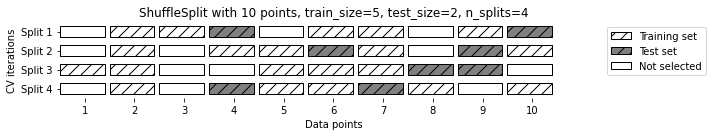

In [15]:
mglearn.plots.plot_shuffle_split()

다음 코드는 데이터셋의 50%를 훈련 세트로, 50%를 테스트 세트로 10번 반복 분할합니다.<sup>[5]</sup>

<sup>[5]</sup>:
ShuffleSplit은 데이터에서 무작위로 추출하여 훈련 세트와 테스트 세트를 만드므로 random_state 매개변수를 지정하지 않으면 실행할 때마다 결과가 다르게 나옵니다.
또한, KFold와 다르게, 하나의 데이터 포인트가 여러 테스트 세트에 포함될 수 있습니다.

In [16]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=10, test_size=0.5, train_size=0.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=ss)
print('교차 검증 점수:', [round(score, 3) for score in scores])

교차 검증 점수: [0.947, 0.987, 0.947, 0.96, 0.987, 0.947, 0.96, 0.96, 0.973, 0.947]


임의의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용합니다.
또한 train_size와 test_size의 합을 다르게 함으로써 전체 데이터의 일부만 사용할 수 있습니다.
이렇게 데이터를 부분 샘플링하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됩니다.

한편 ShuffleSplit의 계층별 버전으로 분류 작업에 더 적합한 StratifiedShuffleSplit도 있습니다.

#### 그룹별 교차 검증

데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증을 널리 사용합니다.
얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명의 사진을 모았다고 가정하겠습니다.
한 사람을 찍은 여러 장의 사진이 각기 다른 표정을 담고 있습니다.
이 데이터셋에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목표입니다.
이 분류기의 성능을 측정하기 위해 계층별 교차 검증을 사용할 수 있지만, 같은 사람의 사진이 훈련 세트와 테스트 세트에 모두 나타날 수 있습니다.
이럴 때 완전히 새로운 얼굴보다 훈련 세트에 있던 얼굴의 표정은 훨씬 쉽게 식별할 수 있을 것입니다.
새 얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야합니다.

이를 위해 사진의 사람이 누구인지 기록한 배열을 groups 매개 변수로 전달받을 수 있는 GroupKFold를 사용할 수 있습니다.<sup>6</sup>
groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것이며, 클래스 레이블과 혼동해서는 안 됩니다.

<sup>6</sup>: cross_val_score 함수로 넘겨진 groups 매개변수는 함수 내부에서 cv의 splits 메서드를 호출할 때 groups를 매개변수로 전달합니다.

데이터에 그룹이 있는 예로는 의로 애플리케이션이 일반적입니다.
여기서는 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 것이 목적입니다.
비슷하게 음성 인식에서도 데이터셋에 같은 사람의 목소리가 여러 개 녹음되어 있을 수 있으며, 관심 사항은 새로운 사람의 대화를 인식하는 것입니다.

아래는 인위적으로 만든 데이터셋에 groups 배열로 그룹을 지정하는 예입니다.
데이터셋은 12개의 포인트로 이뤄져 있고 groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹에 속하는지를 나타냅니다.
4개의 그룹을 나타내고 있으며 처음 3개의 샘플은 첫 번째 그룹, 다음 4개의 샘플은 두 번째 그룹을 나타내는 식입니다.

In [17]:
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋을 만듭니다.
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:', scores)

교차 검증 점수: [0.75       0.6        0.66666667]


샘플 데이터를 그룹으로 정렬할 필요는 없습니다.
여기서는 예를 들기 위해서 정렬한 것뿐입니다.
분할은 다음 코드의 결과처럼 그룹 레이블을 기반으로 계산합니다.
이 그림에서 볼 수 있듯이 각 분할에서 한 그룹 전체가 훈련 세트 아니면 테스트 세트에 있습니다.

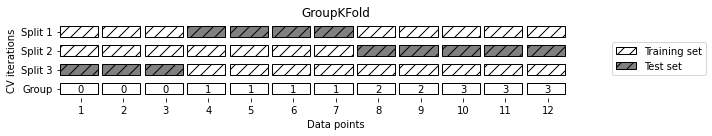

In [18]:
mglearn.plots.plot_group_kfold()

scikit-learn은 다양한 상황에 적용할 수 있는 많은 교차 검증 전략을 제공합니다.
[scikit-learn 사용자 가이드](http://scikit-learn.org/stable/modules/cross_calidation.html)를 참고하세요.
그중 KFold, StratifiedKFold, GroupKFold를 가장 널리 사용합니다.<sup>7</sup>

<sup>7</sup>:
scikit-learn 0.19 버전부터 교차 검증을 반복하여 실행할 수 있는 RepeatedKFold와 RepeatedStratifiedKFold가 추가되었습니다.
자세한 내용은 다음 절과 [블로그](https://goo.gl/Cx8RSr)를 참고하세요.

### 5.1.4 반복 교차 검증<sup>8</sup>

<sup>8</sup>:
이 절의 코드는 번역서 GitHub의 '05.1.4-RepeatedKFold.ipynb' 노트북에 있습니다.

데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행하는 경우가 많습니다.
이를 위해 scikit-learn 0.19 버전에서 RepeatedKFold와 RepeatedStratifiedKFold 분할기가 추가되었습니다.
이 클래스의 객체를 cross_cal_score 또는 cross_calidate 함수의 cv 매개변수에 전달하여 교차 검증을 반복할 수 있습니다.

회귀에는 RepeatedKFold를 사용하고 분류에는 RepeatedStratifiedKFold를 사용합니다.
RepeatedKFold는 KFold 클래스를 사용하여 훈련 폴드와 테스트 폴드를 분할합니다.
이와 비슷하게 RepeatedStratifiedKFold는 StratifiedKFold 클래스를 사용합니다.
분할 폴드 수는 n_splits 매개변수로 설정하며 기본값은 5입니다.
즉, 기본적으로 5-겹 교차 검증을 수행합니다.
반복 횟수는 n_repeats 매개변수로 설정하며 기본값은 10입니다.
반복할 때마다 데이터를 다시 섞습니다.

iris 데이터셋에 반복 교차 검증을 적용해보겠습니다.

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

iris = load_iris()
logreg = LogisticRegression()

iris 데이터셋을 로드한 후 로지스틱 회귀 모델을 준비합니다.
다른 분할기와 마찬가지로 RepeatedKFold와 RepeatedStratifiedKFold도 model_selection 모듈 아래에 위치해 있습니다.
전체 검증 점수는 n_splits × n_repeats 개수 만큼 만들어집니다.
기본값을 사용하여 RepeatedStratifiedKFold의 객체를 만들면 5 × 10, 즉 50개의 모델을 훈련하여 평가한 점수가 반환됩니다.

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print('교차 검증 점수:\n', scores)
print(f'교차 검증 평균 점수: {scores.mean():.3f}')

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965


반복 교차 검증으로 평균 점수 0.965를 얻었습니다.
반복 교차 검증을 위한 두 분할기는 다음 절에 설명한 GridSearchCV의 cv 매개변수에도 적용할 수 있습니다.

## 5.2 그리드 서치

앞에서 모델의 일반화 성능을 측정하는 법을 배웠으니 이제 다음 단계로 매개변수를 튜닝하여 일반화 성능을 개선하겠습니다.
2장과 3장에서 scikit-learn의 여러 알고리즘의 매개변수 설정에 대해 이야기했는데 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요합니다.
모델에서 중요한 매개변수의 일반화 성능을 최대로 높여주는 값을 찾는 일은 어려운 작업이지만, 모든 모델과 데이터셋에서 해야하는 필수적인 일입니다.
많이 하는 작업이므로 scikit-learn에는 이를 위한 메서드가 준비되어 있습니다.
가장 많이 사용하는 방법은 **그리드 서치**로서 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것입니다.

SVC Python 클래스에 구현된 RBF 커널 SVM을 사용해보겠습니다.
2장에서 본 것처럼 커널의 폭에 해당하는 gamma와 규제 매개변수 C가 중요합니다.
매개변수 gamma와 C에 0.001, 0.01, 0.1, 1, 10, 100의 값을 적용해보겠습니다.
gamma와 C의 설정값이 각각 6개씩이니 조합의 수는 총 36개입니다.
모든 조합을 살펴보기 위해 SVM 매개변수 설정 테이블, 즉 그리드는 6 × 6의 행렬을 가지게 됩니다.

### 5.2.1 간단한 그리드 서치

두 매개변수 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치를 for를 사용해 만들 수 있습니다.

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f'훈련 세트의 크기: {X_train.shape[0]}    테스트 세트의 크기: {X_test.shape[0]}')

best_score, best_parameters = 0, None
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 각 매개변수 조합에 대해 SVC를 훈련합니다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다.
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(f'최고 점수: {best_score:.2f}')
print('최적 매개변수:', best_parameters)

훈련 세트의 크기: 112    테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합과 검증 세트

앞의 결과는 이 데이터셋에서 모델 정확도가 97%라고 예측합니다.
하지만 이런 주장은 매우 낙관적이거나 잘못된 것일 수 있습니다.
앞에서 여러 가지 매개변수 값으로 시도해보고 테스트 정확도가 가장 높은 조합을 선택했습니다.
하지만 이 정확도는 새로운 데이터에서 맞지 않을 수 있습니다.
매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 모델이 얼마나 좋은지 평가하는 데 더 이상 사용할 수 없습니다.
즉, 이는 맨 처음 데이터를 훈련 세트와 테스트 세트로 나눈 이유와 같습니다.
따라서, 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요합니다.

데이터를 다시 나눠서 세 개의 세트로 만들어 문제를 해결할 수 있습니다.
훈련 세트로는 모델을 만들고, 검증 혹은 개발 세트로는 모델의 매개변수를 선택하고, 테스트 세트로는 선택된 매개변수의 성능을 평가합니다.

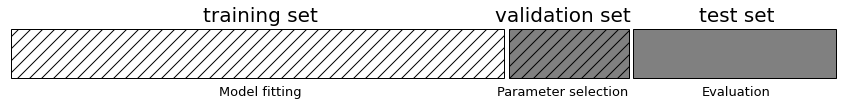

In [22]:
mglearn.plots.plot_threefold_split()

검증 세트를 사용해 최적의 매개변수를 선택한 수, 그 매개변수에서 훈련 세트와 검증 세트 데이터를 모두 이용해 모델을 다시 만듭니다.
이렇게 하는 이유는 모델을 만들 때 가능한 한 많은 데이터를 이용하기 위해서입니다.
다음은 이 과정을 구현한 코드입니다.

In [23]:
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트와 테스트 세트로 분할합니다.
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('훈련 세트의 크기:', X_train.shape[0], '검증 세트의 크기:', X_valid.shape[0], '테스트 세트의 크기:', X_test.shape[0])
print()

best_score, best_parameters = 0, None
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다.
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높다면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f'검증 세트의 최고 점수: {best_score:.2f}')
print('최적 매개변수:', best_parameters)
print(f'최적 매개변수의 테스트 세트 점수: {test_score:.2f}')

훈련 세트의 크기: 84 검증 세트의 크기: 28 테스트 세트의 크기: 38

검증 세트의 최고 점수: 0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}
최적 매개변수의 테스트 세트 점수: 0.92


검증 세트에서 최고 점수는 96%입니다.
전보다 조금 낮아졌는데 아마도 모델을 훈련할 때 사용한 데이터가 적어졌기 때문입니다.
이는 데이터셋을 두 번 나눠서 X_train이 더 작아졌기 때문입니다.
하지만 테스트 세트 점수, 즉 실제 이 모델이 얼마나 잘 일반화됐는지 알려주는 점수는 훨씬 낮은 92%입니다.
따라서, 앞서 예상한 97%가 아니라, 새로운 데이터에 대해 92%만 정확하게 분류한다고 말할 수 있습니다.

훈련 세트, 검증 세트, 테스트 세트의 구분은 실제 머신러닝 알고리즘을 적용하는 데 아주 중요합니다.
테스트 세트 정확도에 기초해 어떤 선택을 했다면 테스트 세트의 정보가 모델에 반영될 것입니다.
그렇기 때문에 최종 평가에만 테스트 세트를 사용하도록 분리해 유지하는 것이 중요합니다.
데이터 탐색을 위한 시각화를 포함해서 모든 탐색적 분석과 모델 선택을 위해서는 훈련 세트와 검증 세트를 사용하는 것을 권장하며, 마지막 평가를 위해 테스트 세트를 보관하는 것이 좋습니다.
정확하게 말하자면 테스트 세트로 둘 이상의 모델을 평가해서 그중 하나를 선택하는 것은 모델의 정확도를 매우 낙관적으로 추정하는 행위입니다.

### 5.2.3 교차 검증을 사용한 그리드 서치

데이터를 훈련 세트, 검증 세트, 테스트 세트로 나누는 방법은 잘 작동하고 널리 사용되지만, 데이터를 나누는 방법에 매우 민감합니다.
이전 코드에서는 C를 10, gamma를 0.001을 최적 매개변수로 선택했지만, 앞 절의 코드에서는 C를 100, gamma를 0.001을 최적으로 선택했습니다.
일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고, 교차 검증을 사용해서 각 매개변수 조합의 성능을 평가할 수 있습니다.
이 방식은 다음 코드를 실행하여 진행됩니다.

In [24]:
import numpy as np

best_score, best_parameters = 0, None
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다.
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다.
        score = np.mean(scores)
        # 점수가 더 높다면 매개변수와 함께 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM의 정확도를 평가하려면 36 × 5 = 180개의 모델을 만들어야 합니다.
여러분이 예상하듯이, 교차 검증의 단점은 이 모델들을 모두 학습시키는 데 걸리는 시간입니다.

다음 코드는 앞의 코드에서 최적의 매개변수를 선택하는 방법을 보여줍니다.

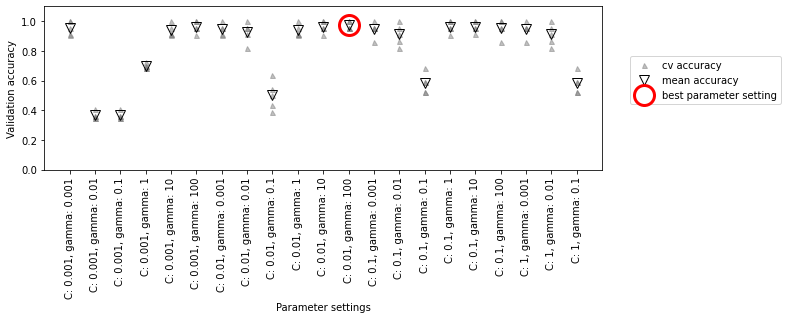

In [25]:
mglearn.plots.plot_cross_val_selection()

각 매개변수 설정마다 교차 검증 분할에 한 개씩, 모두 다섯 개의 값을 계산합니다.
교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시했습니다.

**NOTE\_**
앞서 말한 것 처럼 교차 검증은 어떤 데이터셋에 대해 주어진 알고리즘을 평가하는 방법입니다.
하지만 그리드 서치와 같은 매개변수 탐색 방법과 합쳐서 많이 사용합니다.
그래서 많은 사람이 교차 검증이란 용어를 교차 검증을 사용한 그리드 서치라는 의미로 주로 사용합니다.

데이터를 나누고 그리드 서치를 적용하여 최종 매개변수를 평가하는 전체 과정을 다음 코드로 확인할 수 있습니다.

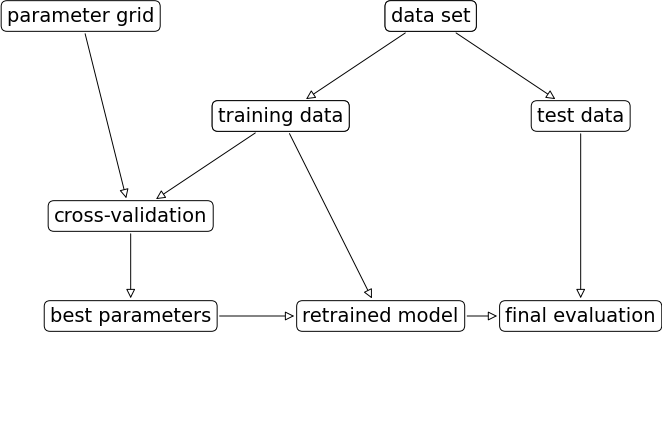

In [26]:
mglearn.plots.plot_grid_search_overview()

교차 검증을 사용한 그리드 서치를 매개변수 조정 방법으로 널리 사용하기 때문에 scikit-learn은 추정기 형태로 구현된 GridSearchCV를 제공하고 있습니다.
GridSearchCV를 사용하려면 먼저 딕셔너리 형태로 검색 대상 매개변수를 지정해야 합니다.
그러면 GridSearchCV는 필요한 모든 모델을 학습시킵니다.
딕셔너리의 키는 조정하고자 하는 매개변수 이름, 즉 모델 생성 시 지정할 것들이고, 값은 탐색할 매개변수의 설정값입니다.
C와 gamma에 0.001, 0.01, 0.1, 1, 10, 100의 값을 시도하려면 다음과 같은 딕셔너리를 만듭니다.

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드:', param_grid)

매개변수 그리드: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


이제 모델, 검색 대상 매개변수 그리드, 원하는 교차 검증으로 GridSearchCV의 객체를 생성합니다.<sup>[9]</sup>

<sup>[9]</sup>:
GridSearchCV도 분류에는 StratifiedKFold를, 회귀에는 KFold를 기본값으로 사용합니다.
scikit-learn 0.22 버전부터는 GridSearchCV의 iid 매개변수 기본값이 True에서 False로 바뀝니다.
0.24 버전에서는 이 매개변수가 아예 삭제될 예정입니다.
iid 매개변수가 True이면 독립 동일 분포라고 가정하고 테스트 세트의 샘플 수로 점수를 가중 평균합니다.
False로 지정하면 단순한 폴드 점수의 평균입니다.
False일 때 기본 교차 검증과 동작 방식이 같습니다.
0.20 버전에서는 iid 매개변수가 기본값일 때 가중 평균과 단순 평균의 차리가 10<sup>-4</sup>이면 경고 메세지가 발생합니다.
또한, 성능 향상을 위해 0.19 버전에 추가된 return\_train\_score 매개변수의 기본값이 0.21 버전부터 False로 바뀝니다.
경고 메세지를 피하고 cv\_results\_ 속성에 훈련 폴드의 점수를 포함시키려면 True로 설정합니다.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

앞서 훈련 세트와 검증 세트로 한 번 분리했던 것과 달리 GridSearchCV는 교차 검증을 사용합니다.
그러나 매개변수가 과대적함되는 것을 피하려면 여기에서도 데이터를 훈련 세트와 테스트 세트로 나눠야 합니다.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search 객체는 분류기와 비슷해서 fit, predict, score 메서드를 제공합니다.<sup>[10]</sup>
하지만 fit 메서드를 호출하면 param_grid에 설정된 매개변수 조합에 대한 교차 검증을 수행합니다.

<sup>[10]</sup>:
다른 추정기를 사용해 만든 추정기를 scikit-learn에서는 메타 추정기라고 합니다.
GridSearchCV는 가장 널리 사용하는 메타 추정기로 자세한 내용은 조금 더 설명할 것입니다.
더 정확하게 말하면 scikit-learn에서 MetaEstimatorMaxin 클래스를 상속한 모델을 메타 추정기라고 부릅니다.
랜덤 포레스트, 그레이디언트 부스팅, RFE 등이 메타 추정기 중 하나입니다.

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

GridSearchCV 객체의 fit 메서드는 최적의 매개변수를 찾을 뿐만 아니라, 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터셋에 대해 새로운 모델을 자동으로 만듭니다.
그래서 fit 메서드에서 처리하는 일은 이 절의 서두에 있는 코드의 결과와 대등합니다.
GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict와 score 메서드를 제공합니다.<sup>[11]</sup>
찾은 매개변수로 일반화 성능을 평가하려면 테스트 세트를 매개변수로 넘겨 score 메서드를 호출하면 됩니다.

<sup>[11]</sup>:
사용하는 모델에 따라서 predict_proba, decision_function 같은 메서드도 사용할 수 있습니다.

In [31]:
print(f'테스트 세트 점수: {grid_search.score(X_test, y_test):.2f}')

테스트 세트 점수: 0.97


교차 검증으로 매개변수를 선택하니 테스트 세트 정확도가 97%인 모델을 얻었습니다.
여기서 중요한 것은 매개변수를 선택하는 데 테스트 세트를 사용하지 않았다는 것입니다.
선택한 매개변수는 best_params_ 속성에 담겨 있으며 최상의 교차 검증 정확도, 즉 해당 매개변수 설정으로 각 분할에서 얻은 정확도의 평균은 best_score_에 저장되어 있습니다.

In [32]:
print('최적 매개변수:', grid_search.best_params_)
print(f'최고 교차 검증 점수: {grid_search.best_score_:.2f}')

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


**CAUTION\_**
테스트 세트로 score 메서드에서 계산하는 모델의 일반화 성능과 best_score_를 혼동해서는 안 됩니다.
score 메서드 또는 predict 메서드의 결과는 전체 훈련 세트에서 학습한 모델에 대한 것입니다.
best_score_ 속성에는 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장됩니다.<sup>[12]</sup>

<sup>[12]</sup>:
훈련 세트가 매개변수 탐색을 위해 5-겹 교차 검증이 적용됐기 때문에 best_score_는 4개의 폴드를 사용하여 학습된 모델의 정확도가 기록되어 있습니다.
GridSearchCV를 사용할 때 전달한 훈련 세트는 앞서 훈련, 검증, 테스트 세트로 나눴을 때의 훈련 세트와 검증 세트를 합친 것에 해당합니다.
우리가 그리드 서치를 직접 구현할 때는 검증 세트를 나눠 놓았지만 GridSearchCV를 사용할 때는 검증 세트가 겉으로 드러나지 않습니다.

가끔은 만들어진 실제 모델에 접근해야 할 때가 있습니다.
예를 들면 계수나 특성 중요도를 살펴보려고 할 때입니다.
최적의 매개변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_ 속성에서 얻을 수 있습니다.

In [33]:
print('최고 성능 모델:')
print(grid_search.best_estimator_)

최고 성능 모델:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


grid\_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델 평가를 위해 best\_estimator\_ 속성을 사용할 필요는 없습니다.

#### 교차 검증 결과 분석

교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됩니다.
그리드 서치는 연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋습니다.
그런 다음 교차 검증된 그리드 서치의 결과를 분석하여 검색을 확장해나갈 수 있습니다.<sup>[13]</sup>
그리드 서치의 결과는 검색과 관련한 여러 정보가 함께 저장되어 있는 딕셔너리인 cv_results_ 속성에 담겨 있습니다.
다음 결과에서 볼 수 있듯이 이 속성에는 상세 정보가 많이 들어 있으므로 pandas의 DataFrame으로 변환해서 보는 것이 좋습니다.<sup>[14]</sup>

<sup>[13]</sup>:
GridSearchCV 외에 널리 사용하는 또 하나의 방식으로, 주어진 범위에서 매개변수를 무작위로 선택하여 조사하는 RandomizedSearchCV가 있습니다.
RandomizedSearchCV의 결과가 GridSearchCV보다 크게 뒤지지 않고 검색이 빠르기 때문에, 매개변수의 조합이 매우 많거나 규제 매개변수와 같이 연속형 값을 조정해야 할 때 널리 사용합니다.
RandomizedSearchCV의 매개변수 샘플링 기본 횟수는 10개이며 n_iter 옵션에서 조절할 수 있습니다.

<sup>[14]</sup>:
cv_results_에는 총 23개의 키가 들어 있어서, 다음 코드에는 이중 일부만 표시했습니다.

In [34]:
import pandas as pd

pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다.
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 설정을 출력합니다.
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00139651,0.00079751,0.000599289,0.000598049,0.000797033
std_fit_time,0.000488052,0.000398755,0.000489321,0.000488305,0.000398518
mean_score_time,0.000399637,0.000199509,0.000599337,0.000399303,0.000197887
std_score_time,0.000489454,0.000399017,0.000489362,0.000489045,0.000395775
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


results의 행 하나는 특정한 하나의 매개변수 설정에 대응합니다.
각 설정에 대해 교차 검증의 모든 분할의 평균값, 표준편차를 포함한 결과가 기록되어 있습니다.<sup>[15]</sup>
검색 대상 매개변수 그리드가 C와 gamma로 2차원이므로, 히트맵으로 시각화하기가 좋습니다.
먼저 교차 검증의 평균을 뽑아서 C와 gamma 축에 맞도록 배열 차원을 바꿉니다.<sup>[16]</sup>

<sup>[15]</sup>:
교차 검증의 테스트 평균 점수가 같은 매개변수 조합이 있을 경우, 테스트 점수의 표준편차가 작은 매개변수 조합이 더 좋다고 판단할 수 있습니다.

<sup>[16]</sup>:
매개변수 탐색 순서는 먼저 C가 고정되고 gamma가 변하는 식이므로 mean_test_score를 6 × 6 배열로 바꾸면 C가 행에 놓이고 gamma가 열 방향으로 변하는 구조가 됩니다.

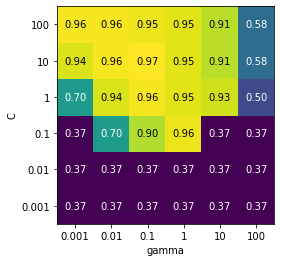

In [35]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# 교차 검증 평균 점수 히트맵 그래프를 그립니다.
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타냅니다.
교차 검증의 정확도가 높으면 밝은 색으로, 낮으면 어두운 색으로 나타냈습니다.
그래프를 보면 SVC가 매개변수 설정에 매우 민감함을 알 수 있습니다.
많은 매개변수 설정에서 40% 부근의 낮은 정확도를 내고 있지만 어떤 설정에서는 96% 이상을 만들었습니다.
이 그래프에서 몇 가지 정보를 얻을 수 있습니다.
먼저 높은 성능을 얻으려면 매개변수 조정이 매우 중요하다는 점입니다.
두 매개변수 C와 gamma가 매우 중요하며 어떻게 조정하는지에 따라 정확도가 40%에서 96%까지 차이가 납니다.
또, 선택한 매개변수 그리드의 범위에서 결과값이 크게 변하고 있습니다.
즉, 각 매개변수의 최적값이 그래프 끝에 놓이지 않도록 매개변수의 범위가 충분히 넓다는 점이 중요합니다.

검색 범위가 적절하게 선택되지 않아서 바람직하지 못한 결과를 내는 그래프 예를 보겠습니다.

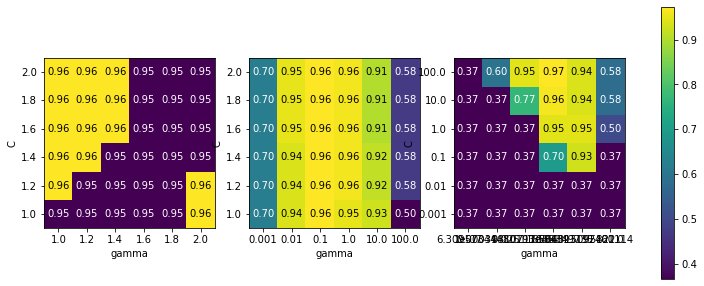

In [38]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, 2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # 교차 검증 편균 점수의 히트맵 그래프를 그립니다.
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis', ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

첫 번째 그래프는 점수 변화가 거의 없어서 전체 매개변수 그리드가 같은 색입니다.
이런 결과는 매개변수 C와 gamma의 스케일과 범위가 부적절할 때 발생합니다.
그러나 매개변수 설정이 바뀌어도 정확도에 아무런 변화가 없다면, 그 매개변수가 전혀 중요하지 않을 것일 수도 있습니다.
처음에는 매우 극단적인 값을 적용해보고, 매개변수를 바꿔가며 정확도가 변하는지 살펴보는 것이 좋습니다.

두 번째 그래프는 세로 띠 형태를 보입니다.
이는 gamma 매개변수만 정확도에 영향을 준다는 뜻입니다.
즉, gamma 매개변수는 적절한 범위를 탐색하고 있지만, C 매개변수는 그렇지 못하든지 중요한 매개변수가 아닐 수도 있습니다.

세 번째 그래프는 C와 gamma 둘 모두에 따라 값이 변했습니다.
하지만 그래프 왼쪽 아래 영역에서는 아무런 변화가 없습니다.
아마도 다음 번 검색 땐 매개변수 그리드에서 매우 작은 단위는 제외될 것입니다.
최적치 그래프가 결계에 있으니 이 경계 너머에 더 나은 값이 있다고 생각할 수 있습니다.
그러니 이 영역에 포함되도록 매개변수 검색 범위를 바꿔줘야 합니다.

교차 검증 점수를 토대로 매개변수 그리드를 튜닝하는 것은 아주 안전한 방법이며, 매개변수들의 중요도를 확인하는 데도 좋습니다.
그러나 최종 테스트 세트를 대상으로 여러 매개변수 범위를 테스트해서는 안됩니다.
앞서 이야기 했지만, 테스트 세트 평가는 사용할 모델이 정확히 결정되고 나서 딱 한 번만 해야 합니다.

#### 비대칭 매개변수 그리드 탐색

어떤 경우에는 모든 매개변수의 조합에 대해 GridSearchCV를 수행하는 것이 좋은 생각이 아닐 수 있습니다.
예를 들어 SVC는 kernel 매개변수를 가지고 있는데 어떤 커널을 사용하는지에 따라 관련 있는 매개변수들이 결정됩니다.
kernel='linear'이면 선형 모델이고 C 매개변수만 사용합니다.
kernel='rbf'이면 C와 gamma를 모두 사용하지만 degree 같은 다른 매개변수는 사용하지 않습니다.
이런 경우에 C, gamma, kernel 매개변수의 모든 조합을 조사하는 것은 맞지 않습니다.
kernel='linear'이면 gamma를 사용하지 않으므로 gamma에 대해 조사하는 것은 시간 낭비입니다.
이런 조건부 매개변수 조합을 적용하려면 GridSearchCV에 전달한 param_grid를 딕셔너리의 리스트로 만들어주면 됩니다.
리스트에 있는 각 딕셔너리는 독립적인 그리드로 적용됩니다.
kernel을 포함한 매개변수 그리드의 예는 다음과 같습니다.

In [44]:
from pprint import pprint

param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
]

print('그리드 목록')
pprint(param_grid)

그리드 목록
[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
  'kernel': ['linear']}]


첫 번째 그리드에서 kernel 매개변수는 kernel 항목의 리스트 길이가 1이므로 rbf로 고정되고 C와 gamma 두 매개변수가 바뀝니다.
두 번째 그리드에서 kernel 매개변수는 항상 linear로 고정되고 C만 바뀝니다. 이제 매개변수 그리드를 적용해보겠습니다.

In [45]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 파라미터:', grid_search.best_params_)
print(f'최고 교차 검증 점수: {grid_search.best_score_:.2f}')

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


cv_results_ 속성을 다시 살펴보겠습니다.
예상대로 kernel이 linear일 땐 C만 변경되었습니다.<sup>[17]</sup>

<sup>[17]</sup>: cv_results_의 내용 중 일부를 중점으로 표시했습니다.

In [46]:
results = pd.DataFrame(grid_search.cv_results_)
# 더 나은 출력을 위해 결과를 전치시킵니다.
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
mean_fit_time,0.0009974,0.0010006,0.000598145,0.000995874,0.000995731,0.00119824,0.000997448,0.000801563,0.000398684,0.000590372,0.000803471,0.000995302,0.00100365,0.000997591,0.000599051,0.000798321,0.000997066,0.00119553,0.000598478,0.000599337,0.000399303,0.00099864,0.000794697,0.000797749,0.000797606,0.000398874,0.000600863,0.000598907,0.000995922,0.00139217,0.000401449,0.00079751,0.000199842,0.000601053,0.000398159,0.00119624,0.000597095,0.00039854,0.000797844,0.000797272,0.000199509,0.00059886,0.00039897,0.000397825,0.000398684,0.000398874,0.000595903,0.000398874,0.000593948,0.000598335,0.000199556,0.000598431,0.000596952,0.00039959,0,0.000797892,0.000604105,0.000199509,0.000598383,0,0.00039897,0.000398922,0.000199699,0.000398827,0.000398254,0.000398922,0.000399017,0.000786829,0.000399828,0.000598621,0.000398874,0.000798368
std_fit_time,1.00702e-06,3.22844e-06,0.000488383,2.64204e-06,3.27459e-06,0.000396999,1.29363e-06,0.000400938,0.000488288,0.000482251,0.000401799,3.50597e-06,9.9562e-06,0.000630918,0.000489123,0.000399161,0.000630902,0.000394419,0.000488656,0.00048936,0.000489045,0.000631058,0.000397395,0.000398874,0.000746124,0.000488519,0.00049063,0.000489007,3.87795e-06,0.000487822,0.000802898,0.000398755,0.000399685,0.000490783,0.000487645,0.00039835,0.000487532,0.000488111,0.000398922,0.00039864,0.000399017,0.000488969,0.000488636,0.000487238,0.000488286,0.000488519,0.000486568,0.000488519,0.000485027,0.000488539,0.000399113,0.000488621,0.000487415,0.000489396,0,0.000398946,0.00049328,0.000399017,0.000488578,0,0.000488636,0.000488578,0.000399399,0.000488462,0.00048776,0.000488578,0.000488695,0.0003936,0.000489689,0.00048898,0.000488519,0.000747539
mean_score_time,0.000399733,0.00019927,0.000399017,0.000199318,0.000398874,0.000397587,0.000199747,0.000404549,0.000199747,0.000606203,0.000399113,0.000206518,0.000990009,0.000199747,0.000399113,0.000797319,0.000400019,0.000399065,0.000199413,0.000601435,0.000399065,0.000396538,0.000200558,0.000199366,0.000401545,0.000398922,0,0.000398922,0.000397778,0.000199461,0.00119672,0.000199652,0,0.000199413,0.000599051,0,0.000199461,0.000199461,0,0.000197506,0.000398874,0.000601101,0.000199413,0.000199556,0.00039897,0.000199509,0,0.000398922,0.000398827,0,0.000598288,0.000399923,0,0.000397253,0.000398922,0.000199461,0.000196123,0.000797844,0,0.000398588,0.000598383,0.000200891,0.000598288,0,0.000399113,0,0.000398779,0.000204659,0.000199318,0.000206852,0.00039897,0.000199556
std_score_time,0.000489571,0.00039854,0.000488694,0.000398636,0.00048852,0.000486947,0.000399494,0.000495546,0.000399494,0.000495169,0.000488812,0.000413036,0.000618763,0.000399494,0.000488811,0.00039866,0.000489923,0.000488753,0.000398827,0.000491101,0.000488753,0.000485669,0.000401115,0.000398731,0.000491806,0.000488578,0,0.000488578,0.000487178,0.000398922,0.000398588,0.000399303,0,0.000398827,0.000489124,0,0.000398922,0.000398922,0,0.000395012,0.000488519,0.000490834,0.000398827,0.000399113,0.000488636,0.000399017,0,0.000488578,0.000488461,0,0.0004885,0.000489807,0,0.000486542,0.000488578,0.000398922,0.000392246,0.000398922,0,0.000488169,0.000488578,0.000401783,0.0004885,0,0.000489077,0,0.000488402,0.000409317,0.000398636,0.000413704,0.000488636,0.000399113
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.

#### 그리드 서치에 다양한 교차 검증 적용

cross_val_score와 비슷하게, GridSearchCV 분류에는 기본적으로 계층형 k-겹 교차 검증을 사용하고 회귀에는 k-겹 교차 검증을 사용합니다.
그러나 GridSearchCV의 cv 매개변수를 통해 '교차 검증 상세 옵션' 절에 나온 다른 교차 검증 분할기를 사용할 수도 있습니다.
특별히 훈련 세트와 검증 세트로 한 번만 분할하려면 n_splits=1로 하고 ShuffleSplit이나 StratifiedSuffleSplit을 사용합니다.
이런 방법은 데이터셋이 매우 크거나 모델 구축에 시간이 오래 걸릴 때 유용합니다.

#### 중첩 교차 검증

앞선 예에서 데이터를 한 번에 훈련, 검증, 테스트 세트로 나눈 방식에서 훈련 세트와 테스트 세트로 나눈 다음 훈련 세트로 교차 검증을 수행하는 방식으로 바꿨습니다.
하지만 GridSearchCV를 사용할 때 여전히 데이터를 훈련 세트와 테스트 세트로 한 번만 나누기 때문에, 결과가 불안정하고 테스트 데이터의 분할에 크게 의존합니다.
원본 데이터를 훈련 세트와 테스트 세트로 한 번만 나누는 방식 대신 더 나아가 교차 검증 분할 방식을 사용할 수 있습니다.
이를 **중첩 교차 검증**이라고 합니다.
중첩 교차 검증에서는 바깥쪽 루프에서 데이터를 훈련 세트와 테스트 세트로 나눕니다.
그리고 각 훈련 세트에 대해 그리드 서치를 실행합니다.
이 경우 바깥쪽 루프에서 분할된 훈련 세트마다 최적의 매개변수가 다를 것입니다.
그런 다음 바깥쪽에서 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정합니다.

이 방법은 모델이나 매개변수 설정이 아닌 테스트 점수의 목록을 만들어줍니다.
이 점수들은 그리드 서치를 통해 찾은 최적 매개변수가 모델을 얼마나 잘 일반화시키는지 알려줍니다.
새로운 데이터에 적용할 모델을 만드는 것이 아니니, 중첩 교차 검증은 미래의 데이터에 적용하기 위한 예측 모델을 찾는 데는 거의 사용하지 않습니다.
그러나 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는 데 유용한 방법입니다.

scikit-learn을 활용하면 중첩 교차 검증을 직관적으로 구현할 수 있습니다.
GridSearchCV의 객체를 모델로 삼아 cross_val_score 함수를 호출하면 됩니다.

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 평균 점수:', scores.mean())

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001


중첨 교차 검증의 결과를 요약하면 'SVC는 iris 데이터셋에서 평균 교차 검증 정확도가 98%이다'라고 할 수 있으며, 그 이상도 이하도 아닙니다.

여기에서 안쪽 루프와 바깥쪽 루프에 각각 계층형 5-겹 교차 검증을 사용했습니다.<sup>[18]</sup>
param_grid의 매개변수 조합은 36개입니다.
이때 만들어지는 모델은 총 36 × 5 × 5 = 900개나 되므로 중첩 교차 검증은 매우 비싼 방법입니다.
여기서 안쪽 루프와 바깥쪽 루프에 같은 교차 검증 분할기를 사용했습니다.
하지만 꼭 이렇게 해야 하는 것은 아니므로 안쪽과 바깥쪽 루프에 각기 다른 교차 검증 전략을 조합해 사용할 수 있습니다.
다음 함수에서 어떤 작업이 일어나는지 이해하기 조금 어렵지만, for 문을 사용하여 간단하게 구현해보면 이해하는 데 도움이 됩니다.

<sup>[18]</sup>:
cross_val_score와 GridSearchCV 모두 분류에서 기본으로 StratifiedKFold를 사용합니다.
이 코드에서 cross_val_score가 바깥쪽 루프를 의미하며 GridSearchCV가 안쪽 루프 역할을 합니다.

In [50]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for로 split 메서드는 훈련 세트와 테스트 세트에 해당하는 인덱스를 반환합니다.
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다.
        best_params, best_score = {}, -np.inf
        # 매개변수 그리드를 순회합니다.
        for parameters in parameter_grid:
            # 안쪽 교차 검증 점수를 기록합니다.
            cv_scores = []
            # inner_cv의 분할을 순회합니다.
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다.
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다.
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다.
            mean_score = np.mean(cv_scores)
            # 평균 점수가 더 높으면 매개변수와 함게 기록합니다.
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다.
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다.
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

이 함수를 iris 데이터셋에 적용해보겠습니다.

In [51]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수:', scores)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]


#### 교차 검증과 그리드 서치 병렬화

그리드 서치는 데이터 용량이 크고 매개변수 수도 많을 때는 상당한 연산 부하를 일으키지만, 다행히 쉽게 병렬화할 수 있습니다.<sup>[19]</sup>
하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해 모델을 만드는 일은 다른 매개변수 설정이나 모델에 전혀 상관없이 진행할 수 있기 때문입니다.
그러므로 그리드 서치와 교차 검증은 여러 CPU 코어 또는 클러스터에 병렬화하기 좋습니다.
GridSearchCV와 cross_val_score에서 n_jobs 매개변수에 사용할 CPU 코어 수를 지정할 수 있습니다.
n_jobs=-1이면 가능한 모든 코어를 사용합니다.

<sup>[19]</sup>:
이는 처치 곤란 병렬이라고도 불립니다.
처치 곤란 병렬이란 처치하기 곤란할 만큼 많은 병렬을 만들 수 있는, 즉 손쉽게 병렬화할 수 있다는 뜻입니다.

아직 충분히 테스트되지는 않았지만 scikit-learn 0.20.0부터는 모델과 GridSearchCV에 모두 n_jobs 매개변수를 지정할 수 있습니다.<sup>[20]</sup>
데이터셋과 모델이 매우 클 때는 여러 코어를 사용하면 너무 많은 메모리를 차지합니다.
그래서 대규모 모델을 병렬로 만들 뗀 메모리 사용 현황을 모니터링하는 것이 좋습니다.

<sup>[20]</sup>:
중첩 교차 검증을 위해서 cross_val_score와 GridSearchCV를 함께 쓸 때도 n_jobs 옵션을 모두 지정할 수 있습니다.

분산 컴퓨팅 패키지인 [Dask](https://ml.dask.org/joblib.html)를 사용하여 클러스터의 여러 머신에서 그리드 서치와 교차 검증을 병렬화할 수도 있습니다.